<a href="https://colab.research.google.com/github/fnfloresra/project_001/blob/main/Fernando_Noe_Flores_Ramirez_Proyecto_5_Clasificacion_de_Imagenes_01072025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [124]:
import zipfile

In [125]:
# @title Default title text
# Descomprimir los archivos
with zipfile.ZipFile('/content/test (CV).zip', 'r') as zip_ref:
    zip_ref.extractall('test')
with zipfile.ZipFile('/content/train (CV).zip', 'r') as zip_ref:
    zip_ref.extractall('train')

In [126]:
root = '/content/train/train'

labels = ['mixed', 'orange', 'apple', 'banana']
label2targets = {l: t for t, l in enumerate(labels)}
targets2label = {t: l for l, t in label2targets.items()}
num_classes = len(targets2label)

In [127]:
label2targets

{'mixed': 0, 'orange': 1, 'apple': 2, 'banana': 3}

In [128]:
targets2label

{0: 'mixed', 1: 'orange', 2: 'apple', 3: 'banana'}

In [129]:
import os
import shutil

# Directorio donde se encuentran tus imágenes
root_dir = '/content/train/train'

# Crea una lista de las categorías basándose en tus archivos
categories = ['apple', 'orange', 'banana', 'mixed']

# Crea subdirectorios para las categorías y mueve los archivos
for category in categories:
    # Crea el directorio si no existe
    os.makedirs(os.path.join(root_dir, category), exist_ok=True)

    # Mueve todos los archivos jpg a su respectivo subdirectorio
    for file in os.listdir(root_dir):
        if file.startswith(category) and file.endswith('.jpg'):
            shutil.move(os.path.join(root_dir, file), os.path.join(root_dir, category, file))

In [130]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import numpy as np


In [57]:
# Crear transformaciones en memoria

# train_datagen = ImageDataGenerator(
#     rescale=1./255, # Normalizar las imágenes
#     rotation_range=40, # Rotar las imágenes hasta 40 grados
#     width_shift_range=0.2, # Desplazar horizontalmente
#     height_shift_range=0.2, # Desplazar verticalmente
#     shear_range=0.2, # Aplicar cortes
#     zoom_range=0.2, # Aplicar zoom
#     horizontal_flip=True, # Voltear imágenes horizontalmente
#     fill_mode='nearest', # Modo de llenado para las transformaciones
#     validation_split=0.2) # Utilizar el 20% de los datos para validación


# train_generator = train_datagen.flow_from_directory(
#     root, # Directorio de datos de entrenamiento
#     target_size=(150, 150), # Redimensionar imágenes a 150x150
#     batch_size=32, # Tamaño del lote
#     class_mode='categorical', # Tipo de clasificación (categórica para múltiples clases)
#     subset='training') # Conjunto de entrenamiento


# validation_generator = train_datagen.flow_from_directory(
#     root, # Directorio de datos de entrenamiento
#     target_size=(150, 150), # Redimensionar imágenes
#     batch_size=32, # Tamaño del lote
#     class_mode='categorical', # Tipo de clasificación
#     subset='validation') # Conjunto de validación

In [131]:
# Augmentación guardada en disco (crear imágenes físicas)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configura tu generador con las mismas transformaciones
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Directorio de entrada (una carpeta con subcarpetas por clase)
input_dir = '/content/train/train'

# Configura el flujo con save_to_dir para guardar
generator = datagen.flow_from_directory(
    input_dir,
    target_size=(150, 150),
    batch_size=1,    # Guarda una imagen por iteración
    class_mode='categorical',
    shuffle=True,
    save_to_dir='/content/augmented',   # Carpeta donde se guardarán
    save_prefix='aug',
    save_format='jpeg'
)

# Crea la carpeta 'augmented' si no existe
import os
os.makedirs('/content/augmented', exist_ok=True)

# Genera y guarda, por ejemplo 100 imágenes augmentadas
num_images_to_generate = 100
for i in range(num_images_to_generate):
    next(generator)   # Cada iteración guarda una imagen nueva


Found 240 images belonging to 4 classes.


In [132]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definir clases
classes = ['apple', 'banana', 'orange', 'mixed']

# Configura tu generador con transformaciones
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

base_input = '/content/train/train'
base_output = '/content/augmented'

for category in classes:
    input_dir = os.path.join(base_input, category)
    output_dir = os.path.join(base_output, category)
    os.makedirs(output_dir, exist_ok=True)

    generator = datagen.flow_from_directory(
        base_input,
        classes=[category],  # Solo una clase a la vez
        target_size=(150, 150),
        batch_size=1,
        save_to_dir=output_dir,
        save_prefix='aug',
        save_format='jpeg'
    )

    for i in range(50):  # Número de imágenes augmentadas por clase
        next(generator)


Found 75 images belonging to 1 classes.


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Found 73 images belonging to 1 classes.
Found 72 images belonging to 1 classes.
Found 20 images belonging to 1 classes.


In [133]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    '/content/augmented',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    '/content/augmented',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1760 images belonging to 4 classes.
Found 440 images belonging to 4 classes.


In [134]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),


    Dense(20, activation='relu'), # Capa de Entrada
    Dropout(0.5),

    Dense(40, activation='relu'), # Capa Oculta 1
    Dropout(0.5),

    #Dense(40, activation='relu'), # Capa de Oculta 2
    #Dropout(0.5),

    Dense(4, activation='softmax') # Capa de Salida
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [135]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2747 - loss: 1.4411

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


55/55 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.2752 - loss: 1.4398 - val_accuracy: 0.4091 - val_loss: 1.1190
Epoch 2/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3823 - loss: 1.2753 - val_accuracy: 0.4227 - val_loss: 1.0744
Epoch 3/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.4481 - loss: 1.1231 - val_accuracy: 0.4091 - val_loss: 1.1926
Epoch 4/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.4566 - loss: 1.0961 - val_accuracy: 0.4773 - val_loss: 1.0161
Epoch 5/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4779 - loss: 1.0299 - val_accuracy: 0.4818 - val_loss: 0.9971
Epoch 6/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.4843 - loss: 0.9899 - val_accuracy: 0.4795 - val_loss: 0.9766
Epoch 7/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5014 - loss: 0.9928 - val_accuracy: 0.4159 - val_loss: 1.1112
Epoch 8/10
55/55 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.4511 - loss: 0.9985 - val_accuracy: 0.4841 - val_loss: 0.9473
Epo

In [ ]:
# TAREA 6 - Optimizar la arquitectura:
# - aumentar el numero de neuronas por capa
# - aumentar mas capas
# - aumentar mas epocas

In [148]:
# IMAGEN DEBE SER JPG, (porque las imagenes que usaron para el entrenamiento fueron JPG)

from google.colab import files
from io import BytesIO
from PIL import Image
import numpy as np

uploaded = files.upload()

Saving varios.jpg to varios.jpg


In [149]:
filename = next(iter(uploaded))
image = Image.open(BytesIO(uploaded[filename]))

# Preprocesamiento de la imagen para que coincida con el input del modelo
image = image.resize((150, 150))  # Ajustar al tamaño de entrada del modelo
image_array = np.array(image) / 255.0  # Normalizar
image_array = np.expand_dims(image_array, axis=0)  # Añadir una dimensión extra para el batch size

# # Predice la clase de la imagen usando el modelo
predictions = model.predict(image_array)
predictions


#class_labels = list(train_generator.class_indices.keys())


#predicted_class = class_labels[np.argmax(predictions)]  # Obtén la clase predicha
#print(f"Esta imagen es: {predicted_class} con una confianza de {np.max(predictions)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[9.9931729e-01, 2.6515201e-05, 2.1998632e-05, 6.3413393e-04]],
      dtype=float32)

No da ninguna confianza, probabilidad del 30% para tres frutas


In [150]:
class_labels = list(train_generator.class_indices.keys())


predicted_class = class_labels[np.argmax(predictions)]  # Obtén la clase predicha
print(f"Esta imagen es: {predicted_class} con una confianza de {np.max(predictions)}")

Esta imagen es: apple con una confianza de 0.9993172883987427


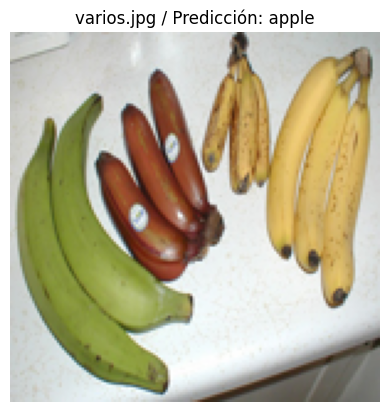

In [151]:
# Visualizar la imagen
import matplotlib.pyplot as plt
plt.imshow(image)
plt.title(f"{filename} / Predicción: {predicted_class}")
plt.axis('off')  # Ocultar los ejes
plt.show()

In [ ]:
# Tarea 7:
# - Subir una imagen y mostrar que la imagen y clase predicha sean la misma

# - Transfer Learning (usar un modelo pre-entrenado ejemplo: ResNet50V2, etc)

# - mostrar accuracy or loss, como cambio

In [ ]:
import os

# List files in the Google Drive folder
drive_path = '/content/drive/MyDrive/'
if os.path.exists(drive_path):
    print(f"Files in {drive_path}:")
    for item in os.listdir(drive_path):
        print(item)
else:
    print(f"The path {drive_path} does not exist.")